## Libraries

In [7]:
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datasets import Dataset

## Config

In [8]:
checkpoint = "checkpoint-9588"
trainer_state_path = f"checkpoints/{checkpoint}/trainer_state.json"

## Load the Training Logs

In [9]:
# Load the config file
with open(trainer_state_path, 'r') as f:
    data = json.load(f)

# Convert dictionary to a Hugging Face Dataset
eval_df = pd.DataFrame(data['log_history'])
eval_df = eval_df.rename(columns={
    'loss': 'train_loss'
    })

# Select evaluation rows
eval_results = eval_df[eval_df['eval_loss'].notna()].copy()

# Forward-fill training columns from previous rows
eval_results[['grad_norm', 'learning_rate', 'train_loss']] = eval_df[['grad_norm', 'learning_rate', 'train_loss']].ffill()

eval_results.reset_index(drop=True, inplace=True)

eval_results.head()


,epoch,grad_norm,learning_rate,train_loss,step,eval_accuracy,eval_auc,eval_f1_harmonic,eval_loss,eval_precision,eval_recall,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,1.0,4.779315,1.600000e-06,0.4366,564,0.945922,0.982879,0.755020,0.200246,0.632997,0.935323,35.9514,62.751,3.922
1,2.0,47.854313,1.200000e-06,0.2429,1128,0.941933,0.984624,0.750476,0.167386,0.608025,0.980100,36.1141,62.469,3.904
2,3.0,1.155716,8.000000e-07,0.2173,1692,0.957447,0.985910,0.789474,0.198762,0.705882,0.895522,36.1212,62.456,3.904
3,4.0,3.934572,4.000000e-07,0.2053,2256,0.957447,0.986324,0.792208,0.197616,0.701149,0.910448,36.0003,62.666,3.917
4,5.0,4.485464,0.000000e+00,0.1929,2820,0.955230,0.986409,0.794297,0.168271,0.672414,0.970149,36.1424,62.420,3.901


## Visualize Training Logs

In [10]:
df_visual = eval_results.copy()
os.makedirs("plots", exist_ok=True)

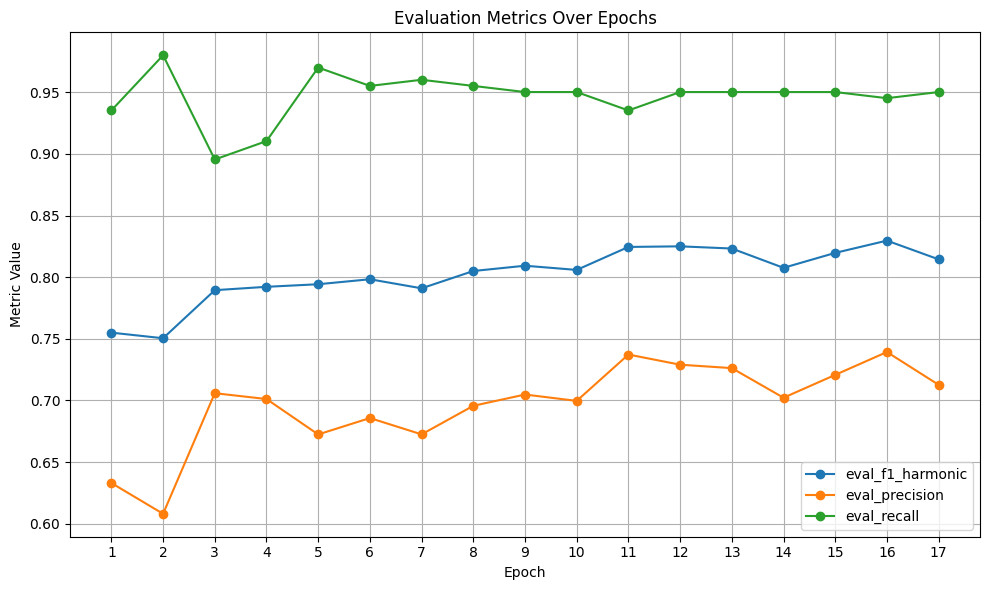

In [11]:
# metrics
metrics = ['eval_f1_harmonic', 'eval_precision', 'eval_recall']

plt.figure(figsize=(10, 6))

# Plot each metric
for metric in metrics:
    plt.plot(df_visual['epoch'], df_visual[metric], marker='o', label=metric)

plt.title('Evaluation Metrics Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.xticks(df_visual['epoch'].unique())
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/eval.png")
plt.show()


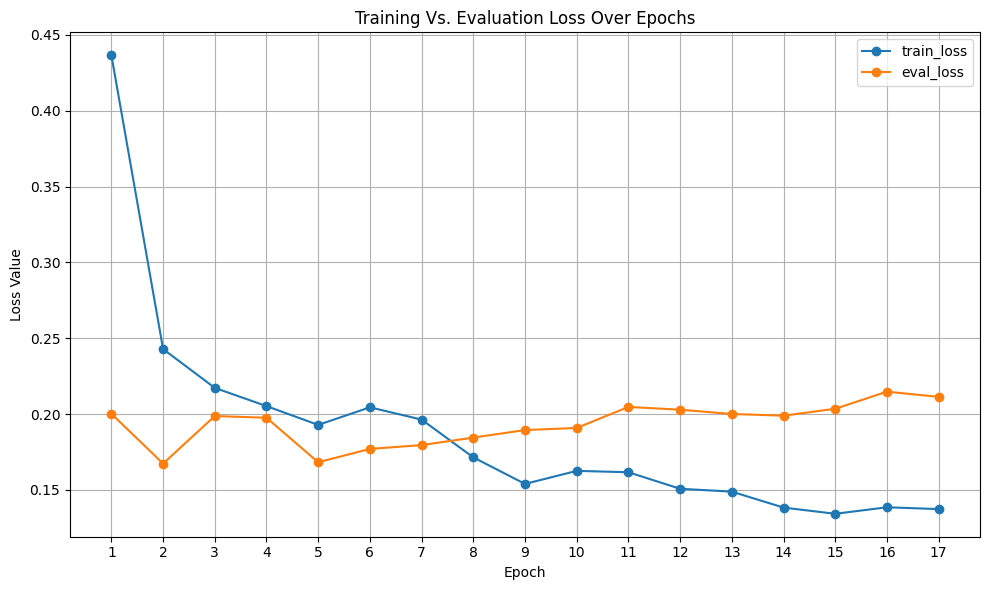

In [12]:
# metrics
df_visual = eval_results.copy()
metrics = ['train_loss', 'eval_loss']

plt.figure(figsize=(10, 6))

# Plot each metric
for metric in metrics:
    plt.plot(df_visual['epoch'], df_visual[metric], marker='o', label=metric)

plt.title('Training Vs. Evaluation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.xticks(df_visual['epoch'].unique())
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("plots/loss.png")
plt.show()
